In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from pyproj import Transformer

# pyproj Transformer 객체 생성 (3857 좌표계 -> 4326 좌표계)
transformer = Transformer.from_crs(3857, 4326, always_xy=True)

def convert_coordinates(coord):
    # 빈 문자열인 경우 처리
    if not coord:
        return None

    try:
        # 좌표값을 파싱하여 x, y 좌표 추출
        x = int(coord[8:24], 16) / 10000000.0
        y = int(coord[24:40], 16) / 10000000.0

        # 좌표 변환
        lon, lat = transformer.transform(x, y)

        return lon, lat
    except ValueError:
        # 유효하지 않은 형식의 좌표값인 경우 처리
        return None

data = pd.read_csv('D:\\장우영\\LOCALSEARCH\\DA\\DA\\data\\FAmerge_20230518_124958.csv', encoding='ANSI')

# 좌표 변환 적용 및 데이터프레임 업데이트
data['geom'] = data['geom'].apply(convert_coordinates)

# 변환된 좌표값 출력 또는 원하는 작업 수행

# 데이터프레임에서 '경도'와 '위도' 열로 분리하여 저장
data['경도'] = data['geom'].apply(lambda x: x[0] if x is not None else None)
data['위도'] = data['geom'].apply(lambda x: x[1] if x is not None else None)


# Convert "insert_time" to numeric representation
data['insert_time'] = pd.to_datetime(data['insert_time']).astype('int64') // 10**9

X = data[["mmsi", "ship_type", "경도", "위도", "cog", "sog", "insert_time", "풍향", "유향", "기온", "수온", "풍속", "유속", "기압", "습도"]]
y = data[["경도", "위도"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 4.4544686963212055e-29


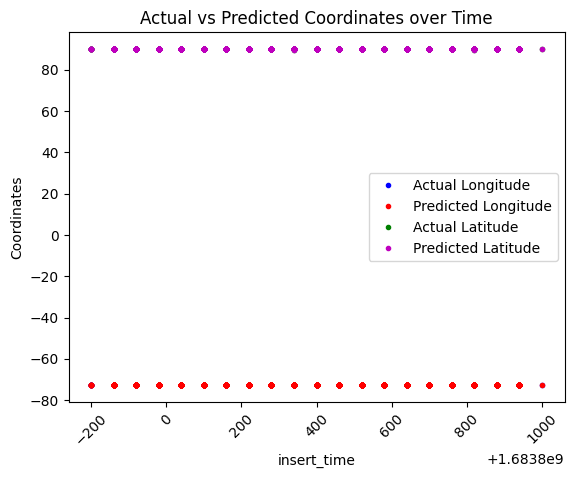

In [5]:
import matplotlib.pyplot as plt

# Set up the figure
fig, ax = plt.subplots()

# Plot insert_time vs 경도
ax.plot(X_test['insert_time'], y_test['경도'], 'b.', label='Actual Longitude')
ax.plot(X_test['insert_time'], y_pred[:, 0], 'r.', label='Predicted Longitude')

# Plot insert_time vs 위도
ax.plot(X_test['insert_time'], y_test['위도'], 'g.', label='Actual Latitude')
ax.plot(X_test['insert_time'], y_pred[:, 1], 'm.', label='Predicted Latitude')

# Set labels and title
ax.set_xlabel('insert_time')
ax.set_ylabel('Coordinates')
ax.set_title('Actual vs Predicted Coordinates over Time')

# Add legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

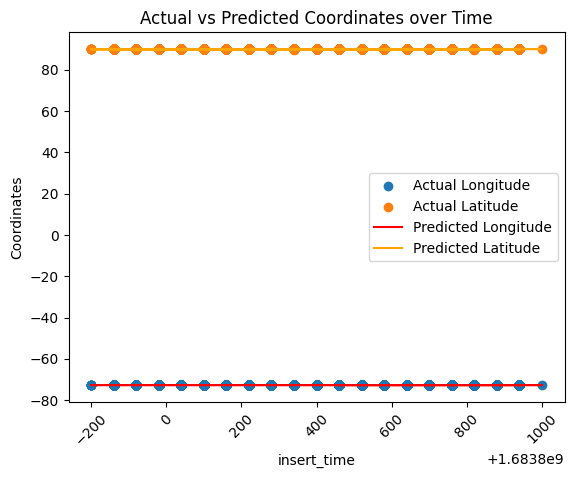

In [6]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(X_test['insert_time'], y_test['경도'], label='Actual Longitude')
plt.scatter(X_test['insert_time'], y_test['위도'], label='Actual Latitude')
plt.plot(X_test['insert_time'], y_pred[:, 0], color='red', label='Predicted Longitude')
plt.plot(X_test['insert_time'], y_pred[:, 1], color='orange', label='Predicted Latitude')

# Set labels and title
plt.xlabel('insert_time')
plt.ylabel('Coordinates')
plt.title('Actual vs Predicted Coordinates over Time')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
#위의 코드는 다음과 같은 작업을 수행

# pandas, sklearn 및 pyproj 라이브러리를 가져옵니다.
# 3857 좌표계에서 4326 좌표계로 좌표를 변환하기 위해 pyproj의 Transformer 객체를 생성합니다.
# convert_coordinates 함수를 정의합니다. 이 함수는 입력된 좌표를 3857 좌표계에서 4326 좌표계로 변환합니다.
# CSV 파일을 pandas의 read_csv 함수를 사용하여 읽어옵니다.
# 좌표 변환을 적용하기 위해 geom 열에 convert_coordinates 함수를 적용합니다.
# 변환된 좌표를 경도와 위도 열로 분리하여 데이터프레임에 저장합니다.
# 'insert_time' 열의 날짜 및 시간 값을 숫자로 변환합니다.
# 예측 변수(X)와 타깃 변수(y)를 설정합니다.
# train_test_split 함수를 사용하여 데이터를 학습 및 테스트 세트로 분할합니다.
# LinearRegression 모델을 생성하고 학습 데이터를 사용하여 모델을 훈련시킵니다.
# 테스트 데이터를 사용하여 예측을 수행하고, 예측 결과와 실제 값 간의 평균 제곱 오차(MSE)를 계산합니다.
# MSE 값을 출력합니다.
# 이 코드는 주어진 CSV 파일에서 좌표 값을 읽어와 3857 좌표계에서 4326 좌표계로 변환하고, 
# 변환된 좌표와 다른 변수들 간의 선형 회귀 모델을 학습하여 예측을 수행합니다. 이를 통해 모델의 예측 성능을 평가할 수 있는 MSE 값을 계산하고 출력합니다.